In [19]:
! pip install node2vec
import networkx as nx 
import matplotlib.pyplot as plt

In [20]:
from node2vec import Node2Vec

In [21]:
G = nx.barbell_graph(m1=7, m2=4)
node2vec = Node2Vec(G, dimensions=2)
model = node2vec.fit(window=10)


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 342.17it/s]


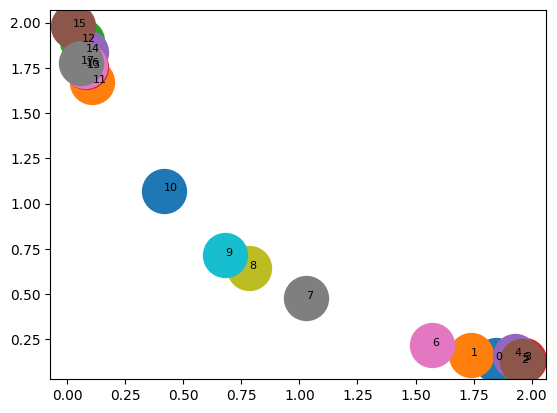

In [22]:
fig, ax = plt.subplots()
for x in G.nodes():
    v = model.wv.get_vector(str(x))
    ax.scatter(v[0], v[1], s=1000)
    ax.annotate(str(x),(v[0],v[1]),fontsize=8)

In [23]:
from node2vec.edges import HadamardEmbedder

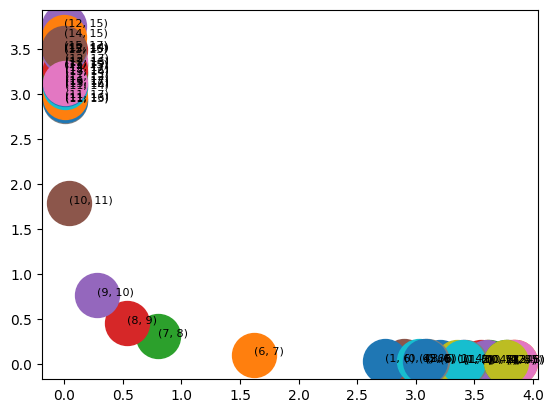

In [24]:
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)
fig, ax = plt.subplots()
for x in G.edges():
    v = edges_embs[(str(x[0]), str(x[1]))]
    ax.scatter(v[0],v[1],s=1000)
    ax.annotate(str(x),(v[0],v[1]),fontsize=8)

In [25]:
! pip install karateclub

In [26]:
import random
import matplotlib.pyplot as plt
from karateclub import Graph2Vec
n_graphs = 20 

In [27]:
def generate_random():
    n = random.randint(5,20)
    k = random.randint(5,n)
    p = random.uniform(0,1)
    return nx.watts_strogatz_graph(n,k,p)


In [28]:
Gs = [generate_random() for x in range(n_graphs)]
model = Graph2Vec(dimensions=2)
model.fit(Gs)
embeddings = model.get_embedding()

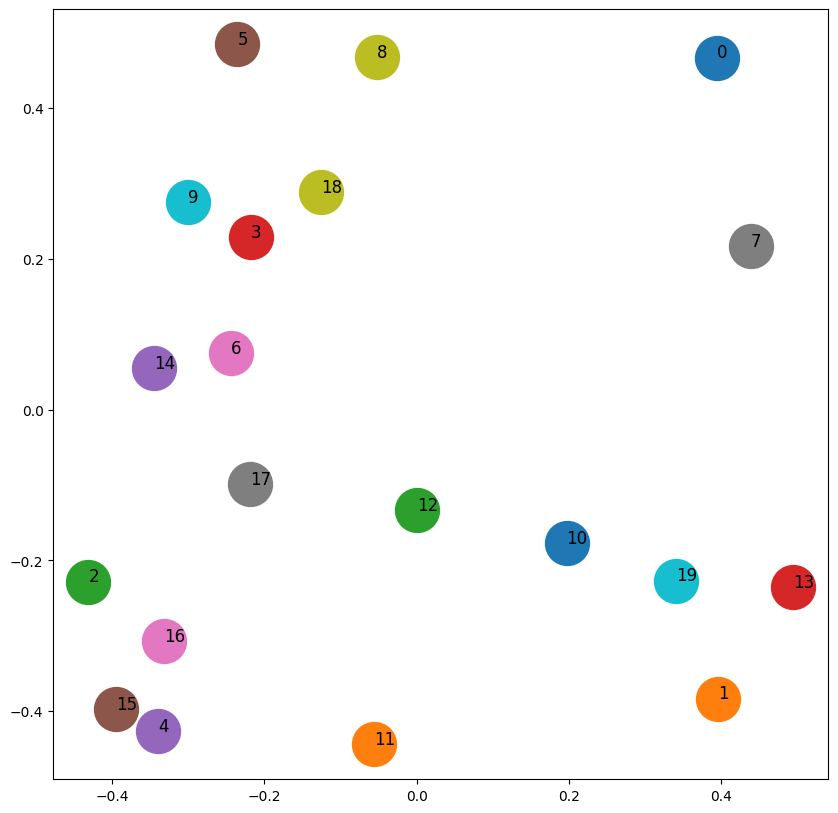

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
for i, vec in enumerate(embeddings):
    ax.scatter(vec[0], vec[1], s=1000)
    ax.annotate(str(i), (vec[0],vec[1]), fontsize=12)